In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


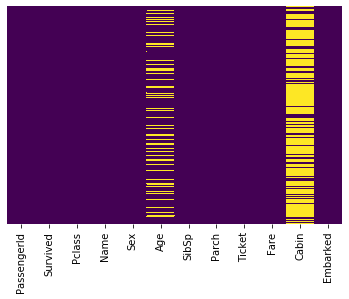

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
sns.set_style('whitegrid')

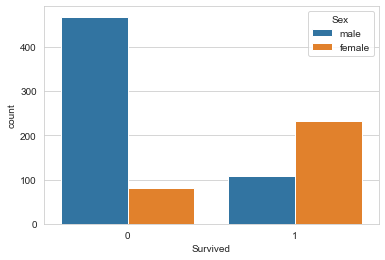

In [10]:
sns.countplot(x='Survived', data=train, hue = 'Sex')

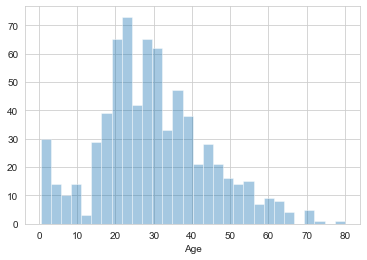

In [11]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

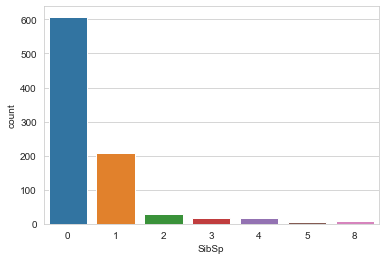

In [13]:
sns.countplot(x='SibSp', data=train)

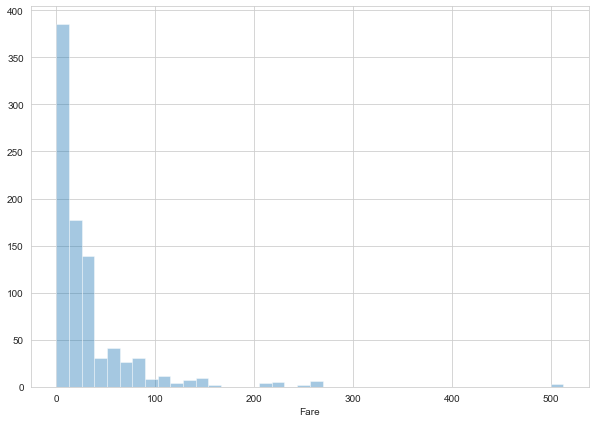

In [21]:
plt.figure(figsize=(10,7))
sns.distplot(train['Fare'], kde=False, bins = 40)

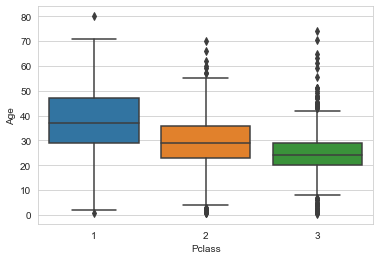

In [51]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [45]:
def impute_age(cols):
    Age = cols['Age']
    Pclass = cols['Pclass']
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: 
        return Age
    

In [46]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

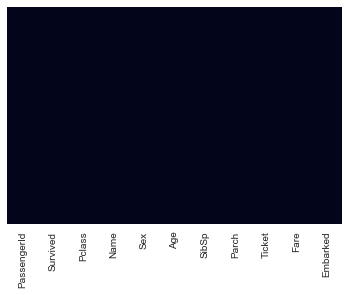

In [56]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [59]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [60]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [62]:
train = pd.concat([train,sex,embark], axis=1)

In [67]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [68]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logModel = LogisticRegression()

In [73]:
logModel.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
predictions = logModel.predict(X_test)

In [75]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]])

In [112]:
# Exercise

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

ad_data.head()

** Use info and describe() on ad_data**

ad_data.info()

ad_data.describe()

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

sns.jointplot(x='Age',y='Area Income',data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

from sklearn.model_selection import train_test_split

X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Train and fit a logistic regression model on the training set.**

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

## Predictions and Evaluations
** Now predict values for the testing data.**

predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))